## Car Prices Prediction Analysis - Machine Learning Project

### 1. Data Cleaning and Pre-processing

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [2]:
# Define the connection credentials
db_user = "postgres"
db_password = quote_plus("@@25#j.m")
db_host = "localhost"
db_port = "5432"
db_name = "postgres"

In [3]:
# Create connection
connection_str = f"postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(connection_str)

In [4]:
# Query table
df = pd.read_sql("SELECT * FROM projects.CarPrice_data", engine)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450


In [5]:
df.drop_duplicates()
df.shape

(205, 26)

### Using the updated dataset

In [6]:
cars_data = pd.read_csv(r'Cars_Data.csv')
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [7]:
cars_data.shape

(8128, 12)

### Checking for the missing values in the data

In [8]:
missing = cars_data.isnull().sum()
percent_missing = round((missing/len(cars_data))*100,2)
print(percent_missing)

name                  0.00
year                  0.00
selling_price         0.00
km_driven             0.00
fuel                  0.00
seller_type           0.00
transmission          0.00
owner                 0.00
mileage(km/ltr/kg)    2.72
engine                2.72
max_power             2.65
seats                 2.72
dtype: float64


In [9]:
# Print a dictionary
data_dictionary = {"Missing Values": missing,
                   "Percentage of Missing values": percent_missing}
print(data_dictionary)

{'Missing Values': name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64, 'Percentage of Missing values': name                  0.00
year                  0.00
selling_price         0.00
km_driven             0.00
fuel                  0.00
seller_type           0.00
transmission          0.00
owner                 0.00
mileage(km/ltr/kg)    2.72
engine                2.72
max_power             2.65
seats                 2.72
dtype: float64}


In [10]:
# Print the dataframe
pd.DataFrame(data_dictionary)

,Missing Values,Percentage of Missing values
name,0,0.00
year,0,0.00
selling_price,0,0.00
km_driven,0,0.00
fuel,0,0.00
seller_type,0,0.00
transmission,0,0.00
owner,0,0.00
mileage(km/ltr/kg),221,2.72
engine,221,2.72


In [11]:
# Drop rows where the target variable is missing
cars_data['selling_price'].isnull().sum()
cars_data.dropna(subset='selling_price', inplace=True)

In [12]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [13]:
# Fill the missing values
cars_data['mileage(km/ltr/kg)'] = cars_data['mileage(km/ltr/kg)'].fillna(cars_data['mileage(km/ltr/kg)']).mean()
cars_data['mileage(km/ltr/kg)'].isnull().sum()

np.int64(0)

In [14]:
# Visualizing the Engine variable
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\1883951427.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


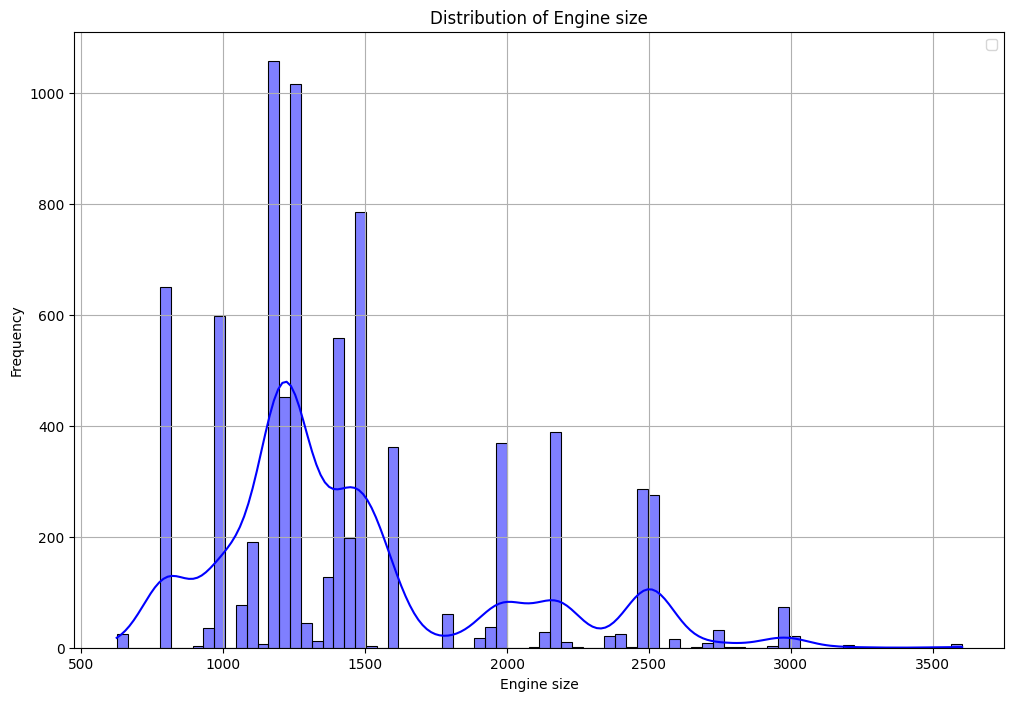

In [15]:
plt.figure(figsize=(12,8))
sns.histplot(x=cars_data['engine'], kde=True, color='blue')
plt.title('Distribution of Engine size')
plt.ylabel('Frequency')
plt.xlabel('Engine size')
plt.legend()
plt.grid(True)
plt.show()

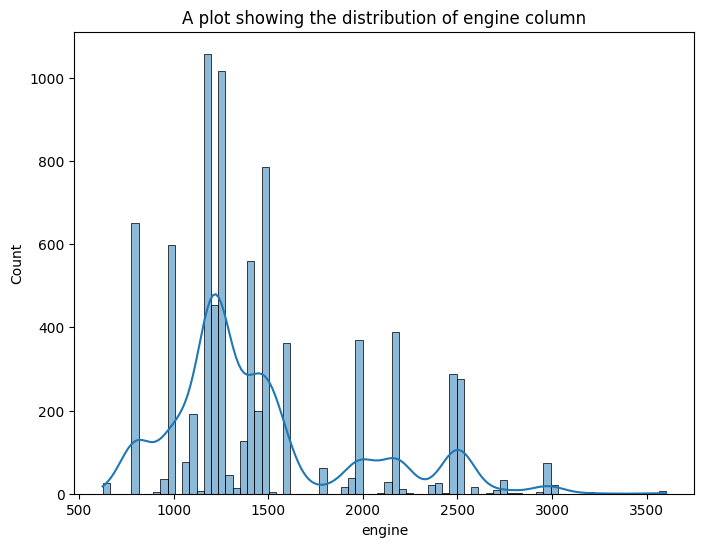

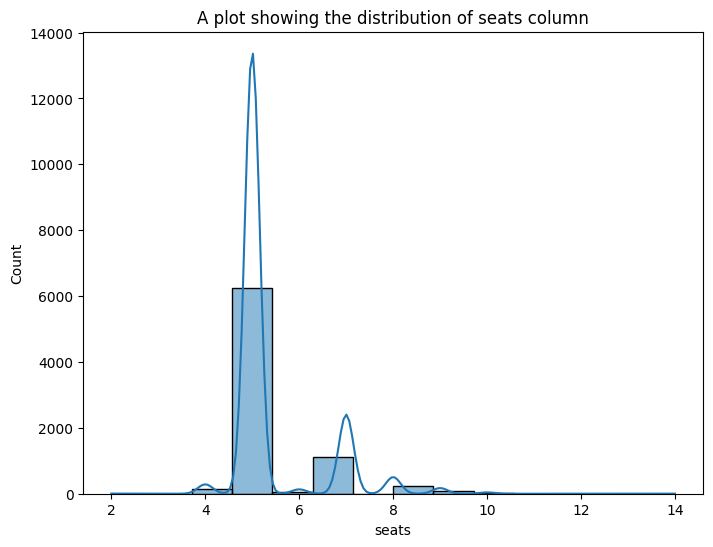

In [16]:
missing_columns = ["engine", "seats"]
for col in missing_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(cars_data, x=cars_data[col], kde=True)
    plt.title(f"A plot showing the distribution of {col} column")

In [17]:
for col in missing_columns:
    cars_data[col] = cars_data[col].fillna(cars_data[col].median())
    print(f"Fill the missing values for: {col}")
    print("*"*100)
cars_data.isnull().sum()

Fill the missing values for: engine
****************************************************************************************************
Fill the missing values for: seats
****************************************************************************************************


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64

In [18]:
cars_data['max_power'] = cars_data['max_power'].str.strip("'\"")

In [19]:
cars_data['max_power'].replace(['', "nan", " ", "None"], np.nan, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\1342607199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_data['max_power'].replace(['', "nan", " ", "None"], np.nan, inplace=True)


In [20]:
cars_data['max_power'] = pd.to_numeric(cars_data['max_power'])

In [21]:
cars_data['max_power'] = cars_data['max_power'].fillna(cars_data['max_power'].median())

In [22]:
# Remove duplicates
cars_data.duplicated().sum()

np.int64(1202)

In [23]:
cars_data = cars_data.drop_duplicates()

In [24]:
cars_data.duplicated().sum()

np.int64(0)

In [25]:
# Create the Car_Age column
current_year = 2025
cars_data['car_age'] = current_year - cars_data['year']
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18


In [26]:
# Show the unique values in the fuel column
cars_data['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [27]:
# Inconsistencies in the transmission column
cars_data['transmission'] = cars_data['transmission'].str.capitalize()
cars_data['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\1126700178.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


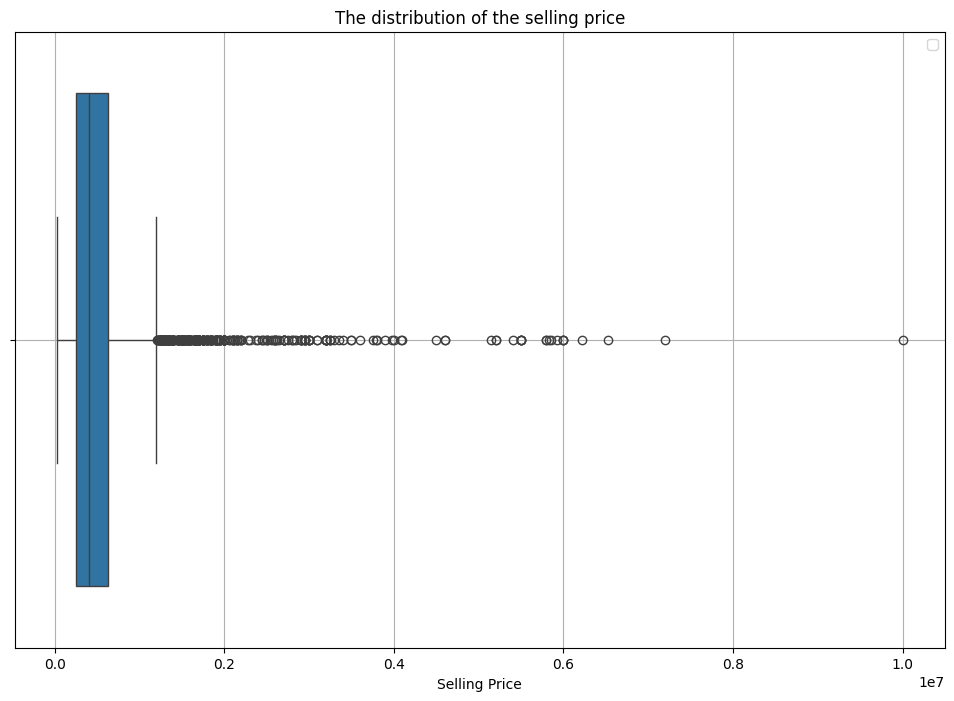

In [28]:
# Check for any outliers in the selling price column using a boxplot
plt.figure(figsize=(12,8))
sns.boxplot(cars_data, x=cars_data['selling_price'])
plt.title('The distribution of the selling price')
plt.xlabel('Selling Price')
plt.legend()
plt.grid(True)
plt.show()

Outliers can distort patterns and affect overall variation in the data distribution

In [31]:
# Remove cars that are priced below 10,000 or above 5000000
cars_data1 = cars_data[(cars_data['selling_price'] >= 10000) & (cars_data['selling_price'] <= 5000000)]
cars_data1.shape

(6906, 13)

- Removes Outliers: Extremely low or high prices (e.g., a typo like "100" or an ultra-rare luxury car at "50,000,000") distort the dataset and mislead the model.

- Reduces Noise: By focusing only on realistic ranges, the model learns true market behavior instead of being distracted by anomalies.

- Improves Accuracy: With fewer irrelevant outliers, predictions become more reliable, especially for common cars within the normal price range.

- Faster Training: Eliminating extreme values reduces computational complexity, making model training more efficient.

In [32]:
cars_data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6906 non-null   float64
 10  max_power           6906 non-null   float64
 11  seats               6906 non-null   float64
 12  car_age             6906 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 755.3+ KB


In [34]:
# Create a new column
cars_data1['price_per_kilometer'] = cars_data1['selling_price']/cars_data1['mileage(km/ltr/kg)']
cars_data1.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\1712787361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars_data1['price_per_kilometer'] = cars_data1['selling_price']/cars_data1['mileage(km/ltr/kg)']


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,car_age,price_per_kilometer
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,19.418783,1248.0,74.00,5.0,11,23173.439434
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,19.418783,1498.0,103.52,5.0,11,19053.716868
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,19.418783,1497.0,78.00,5.0,19,8136.452068
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,19.418783,1396.0,90.00,5.0,15,11586.719717
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,19.418783,1298.0,88.20,5.0,18,6694.549170


In [36]:
cleaned_cars = cars_data1

## Exploratory Data Analysis

In [37]:
# Average selling price of cars
mean = cleaned_cars['selling_price'].mean()
print(mean)

501378.18114682887


In [40]:
# The most common fuel type
common_fuel = cleaned_cars['fuel'].mode()[0]
# Frequency of fuel counts
fuel_count = cleaned_cars['fuel'].value_counts()
print('Most common fuel type:', common_fuel)
print('\nThe frequency of fuel types:\n', fuel_count)

Most common fuel type: Diesel

The frequency of fuel types:
 fuel
Diesel    3741
Petrol    3071
CNG         56
LPG         38
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_13624\3525608346.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


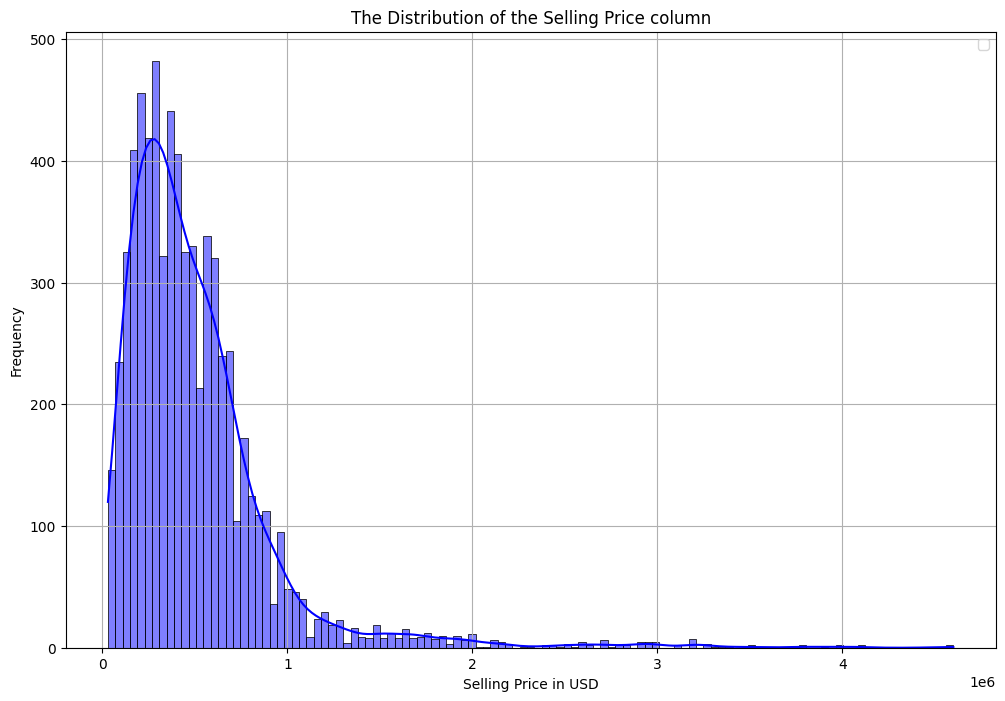

In [42]:
# Histogram of selling price
plt.figure(figsize=(12,8))
sns.histplot(cleaned_cars, x=cleaned_cars['selling_price'], kde=True, color='blue')
plt.title('The Distribution of the Selling Price column')
plt.xlabel('Selling Price in USD')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\3628134086.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


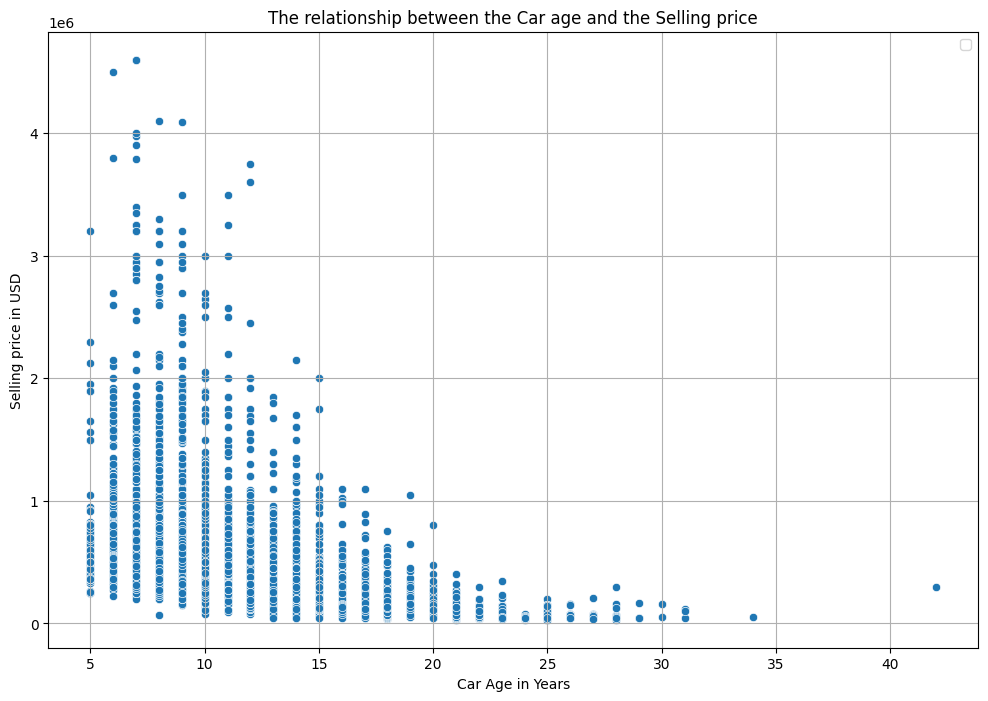

In [43]:
# The relationship between the car age and selling price
plt.figure(figsize=(12,8))
sns.scatterplot(x=cleaned_cars['car_age'], y=cleaned_cars['selling_price'])
plt.title('The relationship between the Car age and the Selling price')
plt.xlabel('Car Age in Years')
plt.ylabel('Selling price in USD')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
# Group fuel type and find the average selling price
group = cleaned_cars.groupby('fuel')['selling_price'].mean()
display(group)

fuel
CNG       300499.946429
Diesel    620448.482224
LPG       200421.052632
Petrol    363717.339629
Name: selling_price, dtype: float64

transmission
Manual       6342
Automatic     584
Name: count, dtype: int64


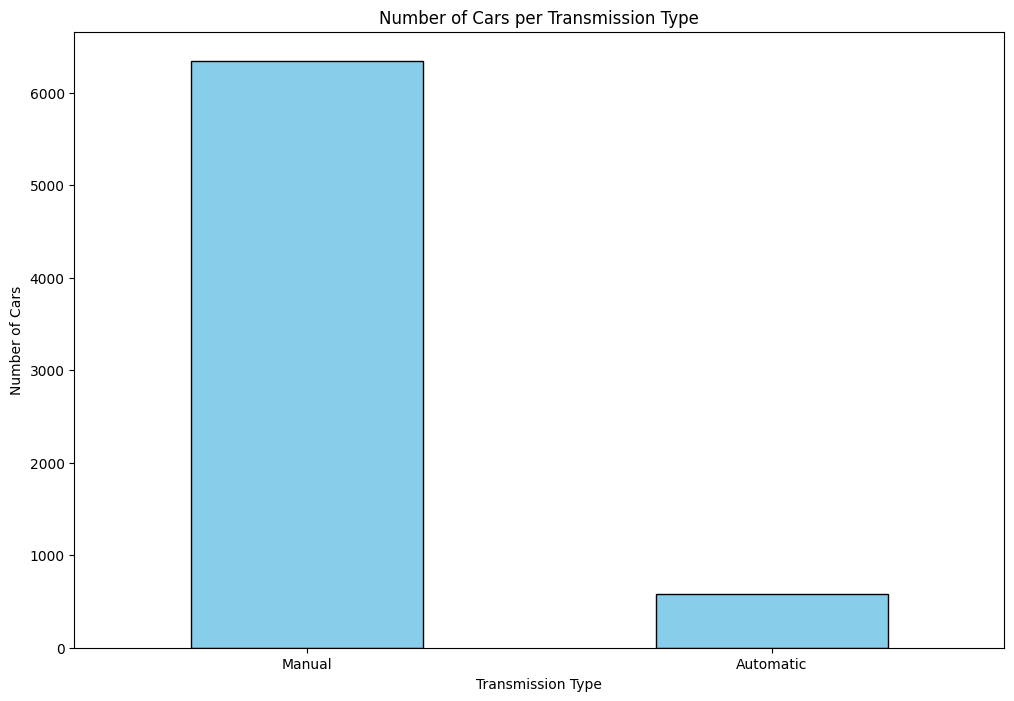

In [50]:
# Count cars per transmission type
transmission_counts = cars_data['transmission'].value_counts()
print(transmission_counts)
# Plot bar chart
plt.figure(figsize=(12,8))
transmission_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Number of Cars per Transmission Type")
plt.xlabel("Transmission Type")
plt.ylabel("Number of Cars")
plt.xticks(rotation=0)
plt.show()

In [54]:
# Find the car with the highest mileage in the dataset
max_mileage = cleaned_cars.loc[cleaned_cars['mileage(km/ltr/kg)'].idxmax()]
print('Car with maximum mileage: ', max_mileage)

Car with maximum mileage:  name                   Maruti Swift Dzire VDI
year                                     2014
selling_price                          450000
km_driven                              145500
fuel                                   Diesel
seller_type                        Individual
transmission                           Manual
owner                             First Owner
mileage(km/ltr/kg)                  19.418783
engine                                 1248.0
max_power                                74.0
seats                                     5.0
car_age                                    11
price_per_kilometer              23173.439434
Name: 0, dtype: object


In [62]:
# Group by transmission type and calculate the mean selling price of cars
average_price_by_transmission = cleaned_cars.groupby('transmission')['selling_price'].mean()
print('Average seeling price by transmission type:', average_price_by_transmission)

Average seeling price by transmission type: transmission
Automatic    1.143215e+06
Manual       4.442991e+05
Name: selling_price, dtype: float64


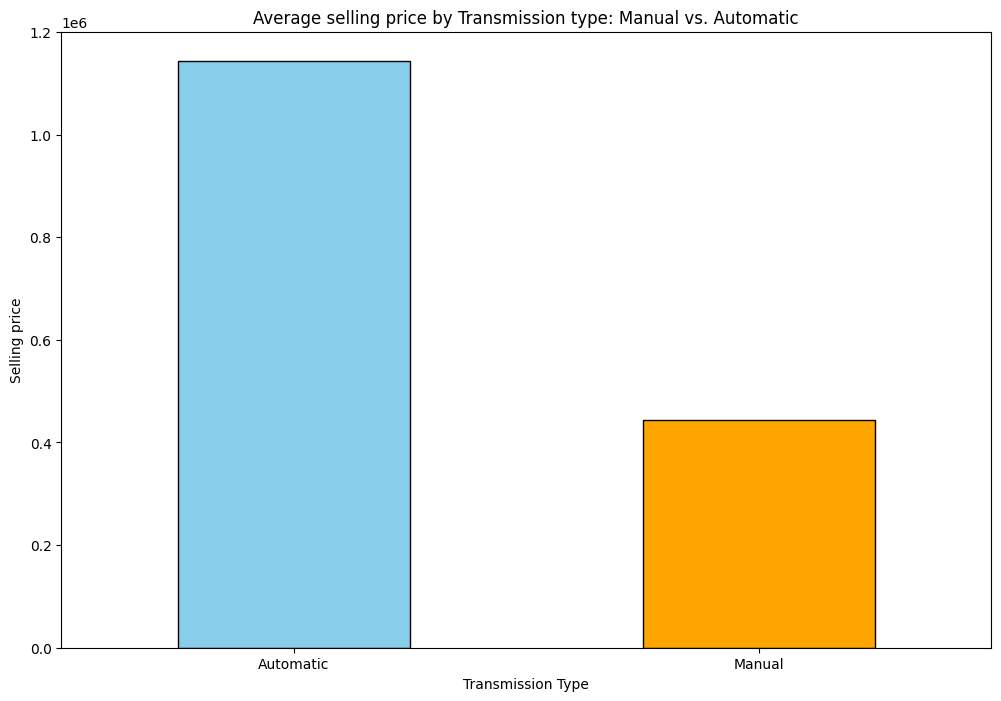

In [63]:
# plot the difference in prices
plt.figure(figsize=(12,8))
average_price_by_transmission.plot(kind='bar', color=['skyblue', 'orange'], edgecolor = 'black')
plt.title('Average selling price by Transmission type: Manual vs. Automatic')
plt.xlabel('Transmission Type')
plt.ylabel('Selling price')
plt.xticks(rotation = 0)
plt.show()

In [64]:
# Average selling price by year of manufacture
Avg_price_by_year = cleaned_cars.groupby('year')['selling_price'].mean()
print(Avg_price_by_year)

year
1983    300000.000000
1991     55000.000000
1994     88000.000000
1995    107500.000000
1996     81666.666667
1997     90181.727273
1998     73100.000000
1999     71470.588235
2000     90047.850000
2001     47220.333333
2002     99153.807692
2003     97034.021277
2004    109364.250000
2005    137994.494505
2006    164383.308943
2007    174894.505682
2008    208397.639024
2009    227691.620833
2010    273897.334211
2011    318335.696751
2012    351387.379139
2013    451501.724199
2014    511858.798623
2015    589177.625551
2016    653180.339105
2017    708006.173913
2018    825749.553897
2019    795583.291667
2020    786548.338710
Name: selling_price, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_13624\3599695664.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


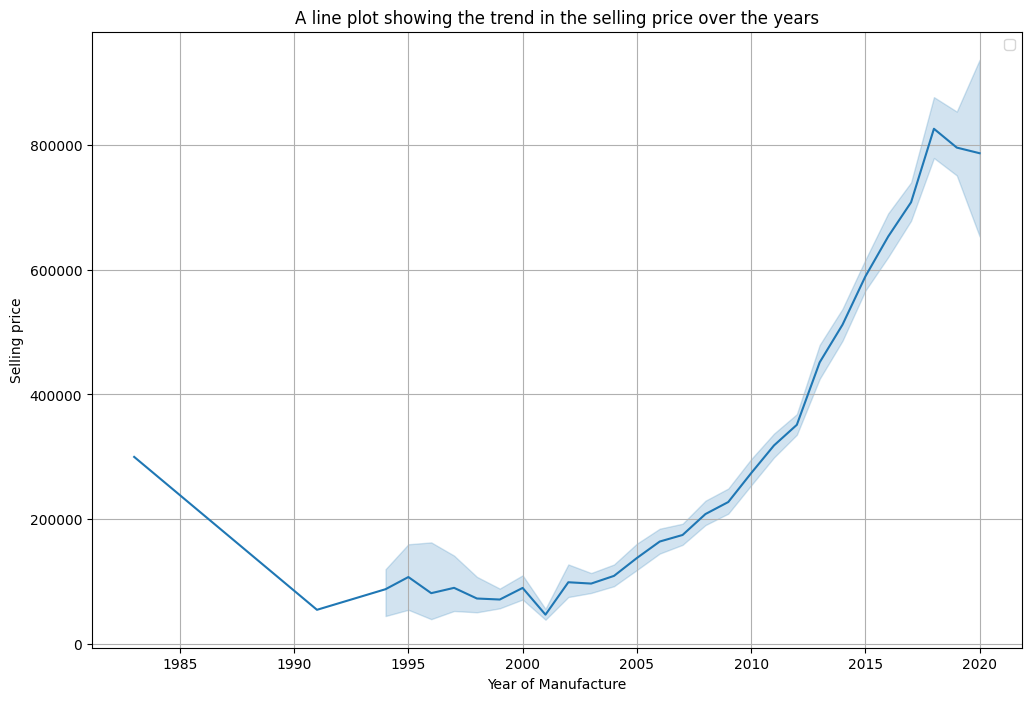

In [65]:
# Plot a line chart to show the trend of selling price over the years
plt.figure(figsize=(12,8))
sns.lineplot(x=cleaned_cars['year'], y=cleaned_cars['selling_price'])
plt.title('A line plot showing the trend in the selling price over the years')
plt.xlabel('Year of Manufacture')
plt.ylabel('Selling price')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# Find the most expensive car for each fuel type
most_expensive_by_fuel = cleaned_cars.loc[cleaned_cars.groupby('fuel')['selling_price'].idxmax(),
                                          ['fuel', 'name', 'selling_price']]
print(most_expensive_by_fuel)

        fuel                                      name  selling_price
5749     CNG     Maruti Ertiga VXI CNG Limited Edition         545000
288   Diesel  Mercedes-Benz GL-Class 220d 4MATIC Sport        4600000
3042     LPG               Hyundai i10 Sportz 1.1L LPG         375000
134   Petrol           Jeep Wrangler 2016-2019 3.6 4X4        4100000


In [70]:
# Find the most frequent brand
most_common_brand = cleaned_cars['name'].value_counts().idxmax()
brand_counts = cleaned_cars['name'].value_counts()
print('Most common brand name: ', most_common_brand)
print('\nBrand with the highest Frequency:\n ', brand_counts.head(10))

Most common brand name:  Maruti Swift Dzire VDI

Brand with the highest Frequency:
  name
Maruti Swift Dzire VDI      118
Maruti Alto 800 LXI          76
Maruti Alto LXi              69
Maruti Swift VDI             60
Maruti Swift VDI BSIV        56
Maruti Alto K10 VXI          47
Hyundai EON Era Plus         44
Maruti Wagon R VXI BS IV     43
Maruti Alto LX               43
Maruti Ertiga VDI            42
Name: count, dtype: int64


In [71]:
# top 5 most common combinations of fuel type and transmission.
top_combinations = (
    cleaned_cars[['fuel', 'transmission']]
    .value_counts()
    .head(5)
)

print('Top 5 fuel and transmission combinations: ', top_combinations)

Top 5 fuel and transmission combinations:  fuel    transmission
Diesel  Manual          3457
Petrol  Manual          2791
Diesel  Automatic        284
Petrol  Automatic        280
CNG     Manual            56
Name: count, dtype: int64


## Machine Learning - Regression Analysis

- Linearity – The relationship between independent variables (features) and the dependent variable (e.g., selling_price) should be linear.

- Homoscedasticity – The residuals (errors) should have constant variance across all levels of the independent variables.

- Normality of Residuals – The residuals should follow a normal distribution.

- No Multicollinearity – Independent variables should not be highly correlated with each other.

- Independence of Errors – Residuals should be independent (no autocorrelation).

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [78]:
le = LabelEncoder()
cleaned_cars['transmission'] = le.fit_transform(cleaned_cars['transmission'])
cleaned_cars['fuel'] = le.fit_transform(cleaned_cars['fuel'])

C:\Users\USER\AppData\Local\Temp\ipykernel_13624\859914777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_cars['transmission'] = le.fit_transform(cleaned_cars['transmission'])
C:\Users\USER\AppData\Local\Temp\ipykernel_13624\859914777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_cars['fuel'] = le.fit_transform(cleaned_cars['fuel'])


In [80]:
X = cleaned_cars[['km_driven', 'fuel', 'transmission', 'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats', 'car_age']]
y = cleaned_cars['selling_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [82]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
# Predcit the selling price
y_pred = model.predict(X_test)

In [85]:
# Evaluate the model
print('Mean Squared Error: ', mean_squared_error(y_pred, y_test))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_pred, y_test)))
print('R-Squared: ', r2_score(y_pred, y_test))

Mean Squared Error:  59698298254.74536
Root Mean Squared Error:  244332.35204275622
R-Squared:  0.5271785200530564


In [86]:
from sklearn.linear_model import Lasso, Ridge

Lasso Regression is a type of linear regression that adds an L1 penalty to the loss function, which shrinks some coefficients toward zero. Unlike linear regression, Lasso can completely eliminate less important features by setting their coefficients to zero, effectively performing feature selection. This makes it especially useful when dealing with datasets that have many features, as it helps reduce overfitting and improves model interpretability.

In [89]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [90]:
y_pred1 = lasso_model.predict(X_test)

In [91]:
# Evaluate model
print('MSE: ', mean_squared_error(y_pred1, y_test))
print('R-Squared: ', r2_score(y_pred1, y_test))

MSE:  59698269148.99639
R-Squared:  0.5271754122573455


In [92]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Ridge Regression applies an L2 penalty that shrinks coefficients but never sets them exactly to zero, meaning all features remain in the model. It often performs better when many features contribute a little bit to the outcome, since it reduces variance without discarding predictors. However, Ridge can perform worse than Lasso when only a few features are truly important, because it does not perform feature selection and may retain noise from irrelevant variables.

In [93]:
y_pred2 = ridge_model.predict(X_test)

In [94]:
# Evaluate model
print('MSE: ', mean_squared_error(y_pred2, y_test))
print('R-Squared:', r2_score(y_pred2, y_test))

MSE:  59697226256.44417
R-Squared: 0.5270388057420949


In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV

In [96]:
# RidgeCV automatically tunes alpha using cross-validation
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
ridge_cv.fit(X, y)

# Cross-validation scores (using R² here)
scores = cross_val_score(ridge_cv, X, y, cv=5, scoring='r2')

print("Best alpha:", ridge_cv.alpha_)
print("Cross-validated R-Squared scores:", scores)
print("Mean R-Squared:", np.mean(scores))

Best alpha: 1.0
Cross-validated R-Squared scores: [0.65032725 0.66042148 0.67050315 0.65295024 0.67228116]
Mean R-Squared: 0.6612966571009299


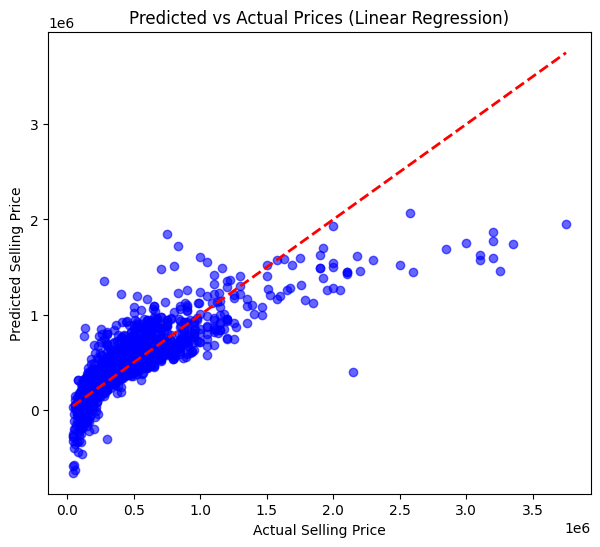

In [98]:
# Plot the actual vs. predicted values of selling price for the best performing model
# Plot Actual vs Predicted
plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)  # ideal line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Predicted vs Actual Prices (Linear Regression)")
plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
# Parameter grid for alpha
param_grid = {'alpha': [0.01, 0.1, 1, 10, 50, 100, 200]}

# GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

print("Best alpha:", grid_search.best_params_['alpha'])
print("Best CV Score (R-Squared):", grid_search.best_score_)

Best alpha: 1
Best CV Score (R-Squared): 0.661202878516028
